# Question-1

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
def freq_col(img):
    filt = np.array([1,1000,1000000])
    
    a = np.dot(img,filt)
    u,c = np.unique(a,return_counts=True)
    ind = np.argmax(c)
    
#     print(u[ind])
    return [ u[ind]%1000, (u[ind]//1000)%1000, (u[ind]//1000000)%1000 ]

def dist(a,b):
    f = np.array([1,1,1])
    c = np.dot(np.power(a-b,2),f)
    return np.power(c,1/2)

def mergeImage(fg,bg):
    cutoff = 190
    bg = cv2.resize(bg,(fg.shape[1],fg.shape[0]))
    green = freq_col(fg)
    dist_mat = dist(fg,green)
#     print(dist_mat)
    bin_mat = dist_mat > cutoff
    out = bg
    out[bin_mat,:] = fg[bin_mat,:]
    return out.astype(np.uint8)

# part1

In [2]:
img = cv2.imread('./../input_data/fg.jpg')
print(freq_col(img))

[8, 255, 21]


# part-2

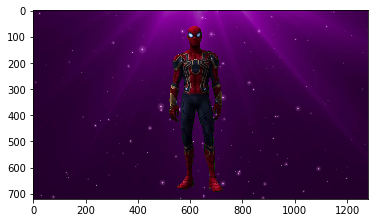

In [3]:
fg = cv2.imread('./../input_data/fg.jpg')
bg = cv2.imread('./../input_data/bg.jpg')
out = mergeImage(fg,bg)
out_rgb = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out_rgb)
plt.show()

The green border in the image can be removed by increasing the cutoff distance. But that may affect the foreground image sometimes(this image is best when generated with a cutoff value of 190)

# part-3

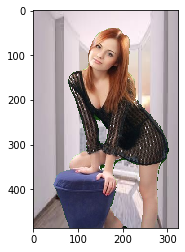

In [10]:
fg = cv2.imread('./../input_data/fg1.jpg')
bg = cv2.imread('./../input_data/bg1.jpg')
out = mergeImage(fg,bg)
out_rgb = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out_rgb)
plt.show()

this image is best when generated with a cutoff value of 120

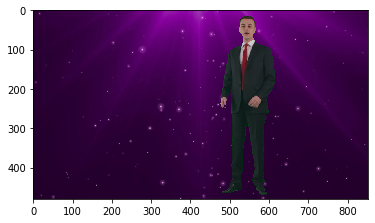

In [4]:
fg = cv2.imread('./../input_data/fg3.jpg')
bg = cv2.imread('./../input_data/bg.jpg')
out = mergeImage(fg,bg)
out_rgb = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out_rgb)
plt.show()

this image is best when generated with a cutoff value of 190

We can see the green border around the foreground object. This is because of shadow of the foreground image, lighting.
